In [2]:
#import libraries

import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sqlalchemy import create_engine

In [4]:
#db connection

user = 'root'
password = 'root'
host = 'localhost'
port = '8889'
database = 'hashawa2'

# Create SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')


In [5]:
with engine.connect() as conn:
    result = conn.execute("DROP TABLE IF EXISTS CUSTOMERS")

In [6]:
with engine.connect() as conn:
    result = conn.execute("""
    CREATE TABLE CUSTOMERS(
    id INT(11) AUTO_INCREMENT PRIMARY KEY NOT NULL, 
    customer_id INT(11) NOT NULL, 
    gender BOOLEAN NOT NULL, 
    maritual BOOLEAN NOT NULL, 
    age DATE, 
    income DECIMAL(11,2) NOT NULL )
    """)
                          

In [7]:
with engine.connect() as conn:
    result = conn.execute("TRUNCATE CUSTOMERS")
    result = conn.execute("""
                          INSERT INTO CUSTOMERS (customer_id,gender, maritual, age, income)
SELECT
    customerId,
    CASE WHEN gender = 'Female' THEN 0 ELSE 1 END AS gender,
    CASE WHEN maritual = 'Single' THEN 0 ELSE 1 END AS maritual,
    dob,
    CASE WHEN businessIncome > (SELECT AVG(businessIncome) FROM tbl_customers WHERE customerStatus != 13) THEN (SELECT AVG(businessIncome) FROM tbl_customers WHERE customerStatus != 13) ELSE businessIncome END AS businessIncome
FROM 
    tbl_customers
WHERE 
    customerStatus != 13 AND CAST(dob AS CHAR) != '0000-00-00';
                          """)

In [8]:
with engine.connect() as conn:
    result = conn.execute("select * from CUSTOMERS")
    #for row in result:
        #print('returned')
    

In [9]:
with engine.connect() as conn:
    result = conn.execute("drop table IF EXISTS LOANS ")
    result = conn.execute("""
    CREATE TABLE LOANS(
    id INT(11) AUTO_INCREMENT PRIMARY KEY NOT NULL, 
    customer_id INT(11) NOT NULL,
    loan_id INT(11),
    loan_amount DECIMAL(11,2) NOT NULL, 
    loan_interest DECIMAL(11,2) NOT NULL, 
    loan_balance DECIMAL(11,2) NOT NULL,
    loan_start DATE,
    loan_end DATE,
    loan_status INT(11),
    penalty_days INT(3),
    penalty_amount DECIMAL(11,2) NOT NULL )
    """)

In [10]:

with engine.connect() as conn:
    result = conn.execute("TRUNCATE LOANS")
    result = conn.execute("""
    INSERT INTO LOANS (customer_id, loan_id, loan_amount, loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount)
SELECT 
    customer,
    scheduleId,
    scheduleAmount, 
    scheduleInterest,
    scheduleBallance,
    startingDate,
    endingDate,
    scheduleStatus,
    missedDays,
    penalty
FROM 
    tbl_loan_schedule
WHERE 
    scheduleStatus != 13;   """)

In [11]:
with engine.connect() as conn:
    loans = conn.execute("""
    SELECT * FROM LOANS INNER JOIN CUSTOMERS ON CUSTOMERS.customer_id = LOANS.customer_id where age != '0980-12-31';
    """)
    
    rows = loans.fetchall()
    columns_name = loans.keys()
    
    result  = [dict(zip(columns_name, row)) for row in rows]

#for row in result:
    #print(row)
    
    



In [12]:
df = pd.DataFrame(result)

In [13]:
df.head()

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00
1,6,17,6,150000.00,45000.00,0.00,2020-07-03,2020-08-07,5,0,0.00,0,0,1979-10-13,45232442.99
2,7,18,7,150000.00,45000.00,7500.00,2020-07-02,2020-08-06,5,6,12000.00,0,0,1985-01-08,45232442.99
3,8,19,8,250000.00,75000.00,0.00,2020-07-07,2020-08-11,5,1,2000.00,0,0,1966-10-16,45232442.99
4,9,20,9,200000.00,60000.00,0.00,2020-07-03,2020-08-07,5,0,0.00,0,1,1981-12-24,45232442.99


In [14]:
df.describe(include='all')

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income
count,4273.000000,4273.000000,4273.000000,4273,4273,4273,4270,4270,4273.000000,4273.000000,4273,4273.000000,4273.000000,4273,4273
unique,NaN,NaN,NaN,30,30,434,777,779,NaN,NaN,59,NaN,NaN,1255,126
top,NaN,NaN,NaN,200000.00,60000.00,0.00,2022-09-26,2022-10-25,NaN,NaN,0.00,NaN,NaN,1968-07-07,300000.00
freq,NaN,NaN,NaN,918,918,2324,35,35,NaN,NaN,2877,NaN,NaN,26,712
mean,608.290194,787.767377,2768.111631,NaN,NaN,NaN,NaN,NaN,5.306810,2.259771,NaN,0.278025,0.449567,NaN,NaN
std,435.471306,527.776963,1573.953729,NaN,NaN,NaN,NaN,NaN,0.462744,7.592465,NaN,0.448078,0.497508,NaN,NaN
min,1.000000,10.000000,5.000000,NaN,NaN,NaN,NaN,NaN,5.000000,-5.000000,NaN,0.000000,0.000000,NaN,NaN
25%,222.000000,336.000000,1384.000000,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,518.000000,709.000000,2775.000000,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
75%,970.000000,1206.000000,4193.000000,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN


In [15]:
from datetime import datetime

In [16]:
df['age'] = pd.to_datetime(df['age'])

In [17]:
today = datetime.today()

In [18]:
df['years'] = ( today - df['age']).astype('<m8[Y]').astype(int)

In [19]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54
1,6,17,6,150000.00,45000.00,0.00,2020-07-03,2020-08-07,5,0,0.00,0,0,1979-10-13,45232442.99,44
2,7,18,7,150000.00,45000.00,7500.00,2020-07-02,2020-08-06,5,6,12000.00,0,0,1985-01-08,45232442.99,39
3,8,19,8,250000.00,75000.00,0.00,2020-07-07,2020-08-11,5,1,2000.00,0,0,1966-10-16,45232442.99,57
4,9,20,9,200000.00,60000.00,0.00,2020-07-03,2020-08-07,5,0,0.00,0,1,1981-12-24,45232442.99,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41


In [20]:
df.describe()

,id,customer_id,loan_id,loan_status,penalty_days,gender,maritual,years
count,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000
mean,608.290194,787.767377,2768.111631,5.306810,2.259771,0.278025,0.449567,44.019658
std,435.471306,527.776963,1573.953729,0.462744,7.592465,0.448078,0.497508,9.667874
min,1.000000,10.000000,5.000000,5.000000,-5.000000,0.000000,0.000000,23.000000
25%,222.000000,336.000000,1384.000000,5.000000,0.000000,0.000000,0.000000,37.000000
50%,518.000000,709.000000,2775.000000,5.000000,0.000000,0.000000,0.000000,43.000000
75%,970.000000,1206.000000,4193.000000,6.000000,1.000000,1.000000,1.000000,50.000000
max,1515.000000,1844.000000,5382.000000,7.000000,197.000000,1.000000,1.000000,79.000000


In [21]:
df = df[df['years'] > 18]

In [22]:
df.describe()

,id,customer_id,loan_id,loan_status,penalty_days,gender,maritual,years
count,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000
mean,608.290194,787.767377,2768.111631,5.306810,2.259771,0.278025,0.449567,44.019658
std,435.471306,527.776963,1573.953729,0.462744,7.592465,0.448078,0.497508,9.667874
min,1.000000,10.000000,5.000000,5.000000,-5.000000,0.000000,0.000000,23.000000
25%,222.000000,336.000000,1384.000000,5.000000,0.000000,0.000000,0.000000,37.000000
50%,518.000000,709.000000,2775.000000,5.000000,0.000000,0.000000,0.000000,43.000000
75%,970.000000,1206.000000,4193.000000,6.000000,1.000000,1.000000,1.000000,50.000000
max,1515.000000,1844.000000,5382.000000,7.000000,197.000000,1.000000,1.000000,79.000000


In [23]:
df['income'].isna().sum()

0

In [24]:
df['income'].min()

Decimal('-430000.00')

In [25]:
df['income'].max()

Decimal('45232442.99')

In [26]:
df = df[df['income'] > 0]

In [27]:
df['loan_amount'].max()

Decimal('5000000.00')

In [28]:
df = df[df['income'] < 7000000]

In [29]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41


In [30]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41


In [31]:
def age_range(age):
    if (age > 60):
        return '60+'
    elif (age > 50):
        return '51 - 60'
    elif (age > 40):
        return '41 - 50'
    elif (age > 30):
        return '31 - 40'
    elif (age > 25):
        return '26 - 30'
    else:
        return '18 - 25'
    

In [32]:
df['age_range'] = df['years'].apply(age_range)

In [33]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years,age_range
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54,51 - 60
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42,41 - 50
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40,31 - 40
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44,41 - 50
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28,26 - 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41,41 - 50
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47,41 - 50
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37,31 - 40
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41,41 - 50


In [34]:
loan_summary = df.groupby('age_range')['loan_amount'].mean()

In [91]:
df_mean_loan_by_age_range = loan_summary.reset_index()
df_mean_loan_by_age_range.to_csv("df_mean_loan_by_age_range.csv")

In [36]:
df_mean_loan_by_age_range

,age_range,loan_amount
0,18 - 25,210416.666667
1,26 - 30,210614.525140
2,31 - 40,235404.411765
3,41 - 50,288394.793926
4,51 - 60,267047.451670
5,60+,293859.649123


In [37]:
df_mean_loan_by_age_range['loan_amount'] = round(df_mean_loan_by_age_range['loan_amount'])

In [38]:
df_mean_loan_by_age_range

,age_range,loan_amount
0,18 - 25,210417.0
1,26 - 30,210615.0
2,31 - 40,235404.0
3,41 - 50,288395.0
4,51 - 60,267047.0
5,60+,293860.0


In [39]:
import seaborn as sns

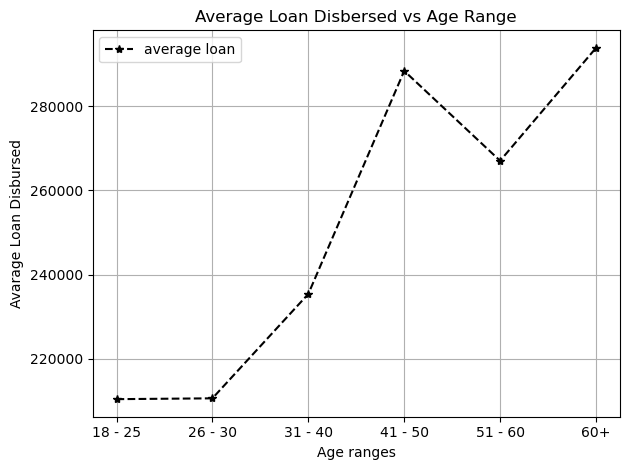

In [40]:
plt.plot(df_mean_loan_by_age_range['age_range'], df_mean_loan_by_age_range['loan_amount'], '*k--', label='average loan')
plt.ylabel('Avarage Loan Disbursed')
plt.xlabel('Age ranges')
plt.title('Average Loan Disbersed vs Age Range')
plt.tight_layout()
plt.grid()
plt.legend()
plt.savefig('Average.png')
plt.show()

In [41]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years,age_range
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54,51 - 60
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42,41 - 50
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40,31 - 40
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44,41 - 50
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28,26 - 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41,41 - 50
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47,41 - 50
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37,31 - 40
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41,41 - 50


In [42]:
df['loan_start'] = pd.to_datetime(df['loan_start'])

In [43]:
nan_count = df['loan_start'].isna().sum()

In [44]:
nan_count

2

In [45]:
df = df.dropna()

In [46]:
df['year'] = df['loan_start'].dt.year.astype(int)

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/2329576484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['loan_start'].dt.year.astype(int)


In [47]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years,age_range,year
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54,51 - 60,2020
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42,41 - 50,2020
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40,31 - 40,2020
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44,41 - 50,2020
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28,26 - 30,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41,41 - 50,2023
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47,41 - 50,2023
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37,31 - 40,2023
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41,41 - 50,2023


In [48]:
df['month'] = df['loan_start'].dt.month.astype(int)

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/834262664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['loan_start'].dt.month.astype(int)


In [49]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years,age_range,year,month
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54,51 - 60,2020,7
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42,41 - 50,2020,7
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40,31 - 40,2020,7
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44,41 - 50,2020,7
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28,26 - 30,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41,41 - 50,2023,9
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47,41 - 50,2023,9
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37,31 - 40,2023,10
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41,41 - 50,2023,9


In [90]:
df_number_of_loans_per_year = df.groupby(df['year']).size().reset_index(name='loan_application')
df_number_of_loans_per_year.to_csv("df_number_of_loans_per_year.csv")

In [51]:
df_number_of_loans_per_year

,year,loan_application
0,2020,494
1,2021,1112
2,2022,1384
3,2023,751


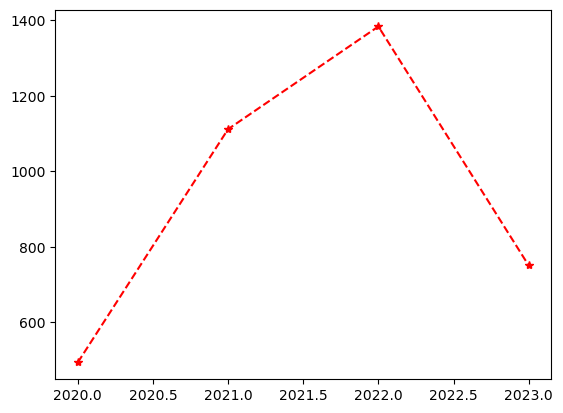

In [52]:
plt.plot(df_number_of_loans_per_year['year'],df_number_of_loans_per_year['loan_application'], '*r--')
plt.show()

In [92]:
df_number_of_loan_per_month = df.groupby(df['month']).size().reset_index(name='loan_application')
df_number_of_loan_per_month.to_csv("df_number_of_loan_per_month.csv")

In [54]:
df_number_of_loan_per_month

,month,loan_application
0,1,172
1,2,138
2,3,138
3,4,306
4,5,359
5,6,506
6,7,559
7,8,486
8,9,442
9,10,268


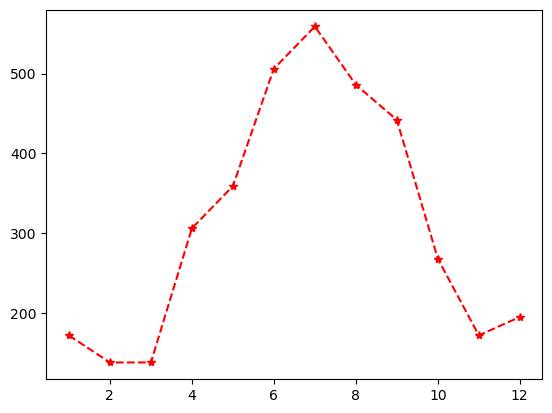

In [55]:
plt.plot(df_number_of_loan_per_month['month'],df_number_of_loan_per_month['loan_application'], '*r--')
plt.show()

In [56]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years,age_range,year,month
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54,51 - 60,2020,7
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42,41 - 50,2020,7
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40,31 - 40,2020,7
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44,41 - 50,2020,7
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28,26 - 30,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41,41 - 50,2023,9
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47,41 - 50,2023,9
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37,31 - 40,2023,10
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41,41 - 50,2023,9


In [57]:
df_number_loan_per_gender_per_year = df.groupby([df['year'], df['gender']]).size().reset_index(name='count')

In [58]:
df_number_loan_per_gender_per_year

,year,gender,count
0,2020,0,352
1,2020,1,142
2,2021,0,894
3,2021,1,218
4,2022,0,981
5,2022,1,403
6,2023,0,469
7,2023,1,282


In [59]:
df['male'] = (df['gender'] == 1).astype(int)

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/1178391551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['male'] = (df['gender'] == 1).astype(int)


In [60]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,penalty_amount,gender,maritual,age,income,years,age_range,year,month,male
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,0.00,1,1,1970-01-13,500000.00,54,51 - 60,2020,7,1
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,4000.00,0,1,1981-12-24,300000.00,42,41 - 50,2020,7,0
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,0.00,1,1,1983-08-18,180000.00,40,31 - 40,2020,7,1
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,1,1980-02-11,250000.00,44,41 - 50,2020,7,0
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,0.00,0,0,1995-07-25,150000.00,28,26 - 30,2020,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,0.00,0,0,1982-07-20,500000.00,41,41 - 50,2023,9,0
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,0.00,0,0,1976-09-20,200000.00,47,41 - 50,2023,9,0
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,0.00,0,0,1987-06-15,300000.00,37,31 - 40,2023,10,0
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,0.00,1,0,1983-05-07,300000.00,41,41 - 50,2023,9,1


In [61]:
df['female'] = (df['gender'] == 0).astype(int)

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/2994543608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['female'] = (df['gender'] == 0).astype(int)


In [62]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,...,gender,maritual,age,income,years,age_range,year,month,male,female
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,...,1,1,1970-01-13,500000.00,54,51 - 60,2020,7,1,0
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,...,0,1,1981-12-24,300000.00,42,41 - 50,2020,7,0,1
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,...,1,1,1983-08-18,180000.00,40,31 - 40,2020,7,1,0
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,0,1,1980-02-11,250000.00,44,41 - 50,2020,7,0,1
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,0,0,1995-07-25,150000.00,28,26 - 30,2020,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,...,0,0,1982-07-20,500000.00,41,41 - 50,2023,9,0,1
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,...,0,0,1976-09-20,200000.00,47,41 - 50,2023,9,0,1
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,...,0,0,1987-06-15,300000.00,37,31 - 40,2023,10,0,1
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,...,1,0,1983-05-07,300000.00,41,41 - 50,2023,9,1,0


In [93]:
df_number_loan_per_male_per_year = df.groupby([df['year'],df['gender'] ]).size().reset_index(name='count')


In [64]:
df_number_loan_per_male_per_year

,year,gender,count
0,2020,0,352
1,2020,1,142
2,2021,0,894
3,2021,1,218
4,2022,0,981
5,2022,1,403
6,2023,0,469
7,2023,1,282


In [97]:
df_number_loan_per_male_per_year = df_number_loan_per_male_per_year[df_number_loan_per_male_per_year['gender'] == 1]
df_number_loan_per_male_per_year.to_csv("df_number_loan_per_male_per_year.csv")

In [66]:
df_number_loan_per_male_per_year

,year,gender,count
1,2020,1,142
3,2021,1,218
5,2022,1,403
7,2023,1,282


In [95]:
df_number_loan_per_female_per_year = df.groupby([df['year'],df['gender'] ]).size().reset_index(name='count')


In [68]:
df_number_loan_per_female_per_year

,year,gender,count
0,2020,0,352
1,2020,1,142
2,2021,0,894
3,2021,1,218
4,2022,0,981
5,2022,1,403
6,2023,0,469
7,2023,1,282


In [96]:
df_number_loan_per_female_per_year = df_number_loan_per_female_per_year[df_number_loan_per_female_per_year['gender'] == 0]
df_number_loan_per_female_per_year.to_csv("df_number_loan_per_female_per_year.csv")

In [70]:
df_number_loan_per_female_per_year

,year,gender,count
0,2020,0,352
2,2021,0,894
4,2022,0,981
6,2023,0,469


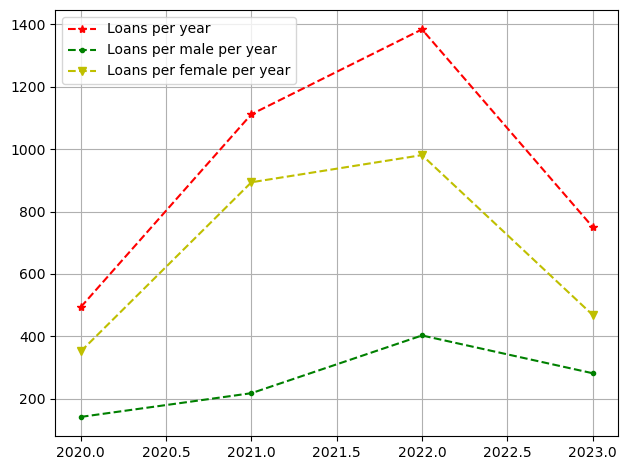

In [71]:
plt.plot(df_number_of_loans_per_year['year'],df_number_of_loans_per_year['loan_application'], '*r--', label='Loans per year')
plt.plot(df_number_loan_per_male_per_year['year'],df_number_loan_per_male_per_year['count'], '.g--', label='Loans per male per year')
plt.plot(df_number_loan_per_female_per_year['year'],df_number_loan_per_female_per_year['count'], 'vy--', label='Loans per female per year')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

In [72]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,...,gender,maritual,age,income,years,age_range,year,month,male,female
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,...,1,1,1970-01-13,500000.00,54,51 - 60,2020,7,1,0
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,...,0,1,1981-12-24,300000.00,42,41 - 50,2020,7,0,1
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,...,1,1,1983-08-18,180000.00,40,31 - 40,2020,7,1,0
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,0,1,1980-02-11,250000.00,44,41 - 50,2020,7,0,1
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,0,0,1995-07-25,150000.00,28,26 - 30,2020,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,...,0,0,1982-07-20,500000.00,41,41 - 50,2023,9,0,1
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,...,0,0,1976-09-20,200000.00,47,41 - 50,2023,9,0,1
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,...,0,0,1987-06-15,300000.00,37,31 - 40,2023,10,0,1
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,...,1,0,1983-05-07,300000.00,41,41 - 50,2023,9,1,0


In [73]:
df.columns

Index(['id', 'customer_id', 'loan_id', 'loan_amount', 'loan_interest',
       'loan_balance', 'loan_start', 'loan_end', 'loan_status', 'penalty_days',
       'penalty_amount', 'gender', 'maritual', 'age', 'income', 'years',
       'age_range', 'year', 'month', 'male', 'female'],
      dtype='object')

In [74]:
df['debt_to_income_ratio'] = df['loan_amount'] / df['income']

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/2775123927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['debt_to_income_ratio'] = df['loan_amount'] / df['income']


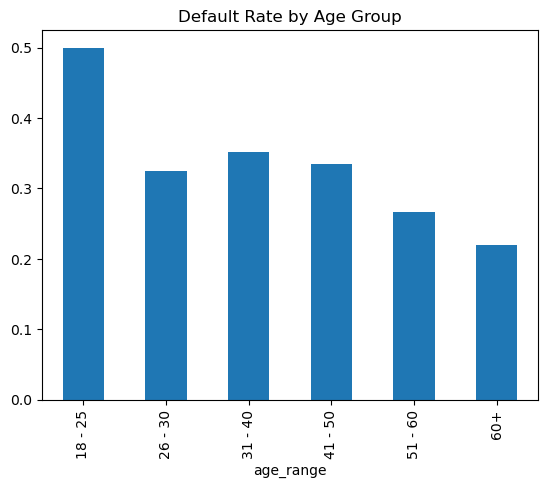

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Default Analysis by Age Group
age_default_rate = df.groupby('age_range')['loan_status'].apply(lambda x: (x == 6).mean())
age_default_rate.plot(kind='bar', title='Default Rate by Age Group')
plt.show()


In [76]:
age_default_rate

age_range
18 - 25    0.500000
26 - 30    0.324022
31 - 40    0.351252
41 - 50    0.334056
51 - 60    0.267135
60+        0.219298
Name: loan_status, dtype: float64

In [77]:
from decimal import Decimal
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].apply(lambda x: Decimal(str(x)).quantize(Decimal('0.0')))

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/927529004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['debt_to_income_ratio'] = df['debt_to_income_ratio'].apply(lambda x: Decimal(str(x)).quantize(Decimal('0.0')))


In [78]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,...,maritual,age,income,years,age_range,year,month,male,female,debt_to_income_ratio
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,...,1,1970-01-13,500000.00,54,51 - 60,2020,7,1,0,0.3
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,...,1,1981-12-24,300000.00,42,41 - 50,2020,7,0,1,0.3
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,...,1,1983-08-18,180000.00,40,31 - 40,2020,7,1,0,2.2
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,1,1980-02-11,250000.00,44,41 - 50,2020,7,0,1,0.4
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,0,1995-07-25,150000.00,28,26 - 30,2020,7,0,1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,...,0,1982-07-20,500000.00,41,41 - 50,2023,9,0,1,0.4
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,...,0,1976-09-20,200000.00,47,41 - 50,2023,9,0,1,0.5
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,...,0,1987-06-15,300000.00,37,31 - 40,2023,10,0,1,0.3
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,...,0,1983-05-07,300000.00,41,41 - 50,2023,9,1,0,0.5


In [79]:
print(df['loan_status'].unique())

[5 6]


In [80]:
# Check for NaN values
print(df.isna().sum())

id                      0
customer_id             0
loan_id                 0
loan_amount             0
loan_interest           0
loan_balance            0
loan_start              0
loan_end                0
loan_status             0
penalty_days            0
penalty_amount          0
gender                  0
maritual                0
age                     0
income                  0
years                   0
age_range               0
year                    0
month                   0
male                    0
female                  0
debt_to_income_ratio    0
dtype: int64


In [81]:
#df['loan_status'] = df['loan_status'].fillna(5)
df['income'] = df['income'].fillna(df['income'].mean())

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/3963862754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].fillna(df['income'].mean())


In [82]:
# Ensure loan_status is an integer
df['loan_status'] = df['loan_status'].astype(int)

# Ensure income is a float
df['income'] = df['income'].astype(float)


/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/4236705936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = df['loan_status'].astype(int)
/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/4236705936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].astype(float)


In [83]:
# Group by income quintiles and calculate default rate
income_default_rate = df.groupby(pd.qcut(df['income'], 5))['loan_status'].apply(lambda x: (x == 6).mean())

print(income_default_rate)

income
(19999.999, 290000.0]    0.275591
(290000.0, 310000.0]     0.386126
(310000.0, 400000.0]     0.324487
(400000.0, 600000.0]     0.329114
(600000.0, 6300000.0]    0.296980
Name: loan_status, dtype: float64


/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_94801/2138821397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_default_rate'] = df.groupby(pd.qcut(df['income'], 5))['loan_status'].apply(lambda x: (x == 6).mean())


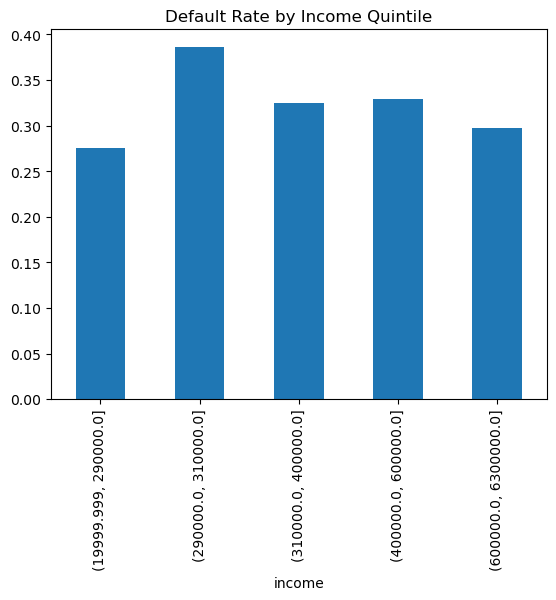

In [84]:
# Default Analysis by Income
df['income_default_rate'] = df.groupby(pd.qcut(df['income'], 5))['loan_status'].apply(lambda x: (x == 6).mean())
income_default_rate = df.groupby(pd.qcut(df['income'], 5))['loan_status'].apply(lambda x: (x == 6).mean())
income_default_rate.plot(kind='bar', title='Default Rate by Income Quintile')
plt.show()

In [85]:
income_default_rate

income
(19999.999, 290000.0]    0.275591
(290000.0, 310000.0]     0.386126
(310000.0, 400000.0]     0.324487
(400000.0, 600000.0]     0.329114
(600000.0, 6300000.0]    0.296980
Name: loan_status, dtype: float64

In [86]:
df['debt_to_income_ratio'] = df['loan_amount'] / df['income']

TypeError: unsupported operand type(s) for /: 'decimal.Decimal' and 'float'

/var/folders/_f/80k3m9b953x__9ngslzqwk_40000gn/T/ipykernel_83371/831824951.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['age', 'income', 'debt_to_income_ratio', 'loan_status']].corr()


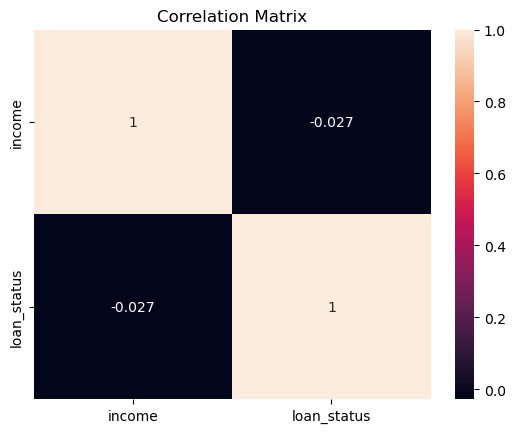

In [ ]:
corr_matrix = df[['age', 'income', 'debt_to_income_ratio', 'loan_status']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
print(df['maritual'].unique())

[1 0]


In [87]:
df

,id,customer_id,loan_id,loan_amount,loan_interest,loan_balance,loan_start,loan_end,loan_status,penalty_days,...,age,income,years,age_range,year,month,male,female,debt_to_income_ratio,income_default_rate
0,1,10,5,150000.00,45000.00,0.00,2020-07-02,2020-08-06,5,0,...,1970-01-13,500000.0,54,51 - 60,2020,7,1,0,0.3,NaN
35,217,329,49,100000.00,30000.00,0.00,2020-07-03,2020-08-07,5,2,...,1981-12-24,300000.0,42,41 - 50,2020,7,0,1,0.3,NaN
68,99,142,124,400000.00,120000.00,0.00,2020-07-14,2020-08-18,5,0,...,1983-08-18,180000.0,40,31 - 40,2020,7,1,0,2.2,NaN
69,101,144,127,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,1980-02-11,250000.0,44,41 - 50,2020,7,0,1,0.4,NaN
70,102,145,128,100000.00,30000.00,5000.00,2020-07-02,2020-08-06,5,0,...,1995-07-25,150000.0,28,26 - 30,2020,7,0,1,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,1514,1843,5377,200000.00,60000.00,260000.00,2023-09-06,2023-10-05,6,0,...,1982-07-20,500000.0,41,41 - 50,2023,9,0,1,0.4,NaN
4269,1082,1365,5378,100000.00,30000.00,130000.00,2023-09-09,2023-10-09,6,0,...,1976-09-20,200000.0,47,41 - 50,2023,9,0,1,0.5,NaN
4270,1426,1750,5379,100000.00,30000.00,130000.00,2023-10-04,2023-11-02,6,0,...,1987-06-15,300000.0,37,31 - 40,2023,10,0,1,0.3,NaN
4271,1515,1844,5380,150000.00,45000.00,195000.00,2023-09-14,2023-10-13,6,0,...,1983-05-07,300000.0,41,41 - 50,2023,9,1,0,0.5,NaN


In [105]:
try:
    df.to_csv("loans.csv", index=False)
    print("CSV file created successfully.")
except Exception as e:
    print(f"Failed to create CSV file: {e}")
df.columns

CSV file created successfully.


Index(['id', 'customer_id', 'loan_id', 'loan_amount', 'loan_interest',
       'loan_balance', 'loan_start', 'loan_end', 'loan_status', 'penalty_days',
       'penalty_amount', 'gender', 'maritual', 'age', 'income', 'years',
       'age_range', 'year', 'month', 'male', 'female', 'debt_to_income_ratio',
       'income_default_rate'],
      dtype='object')

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,  mean_squared_error


In [154]:
X = df[['gender','years','income','maritual']]
y = df['loan_amount']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lr = LinearRegression()

In [158]:
lr.fit(X_train, y_train)

LinearRegression()

In [159]:
y_pred = lr.predict(X_test)

In [160]:
y_pred

array([314979.35309236, 222143.75281919, 251564.59367585, ...,
       220697.53065037, 201538.5794139 , 198700.88907919])

In [166]:
# Calculate R-squared (R^2)
#r_squared = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y, y_pred)


#print(f"R-squared (R^2): {r_squared:.2f}")
#print(f"Mean Squared Error (MSE): {mse:.2f}")

In [117]:
import joblib

In [118]:
joblib.dump(lr, 'loan_amount_prediction_model.joblib')

['loan_amount_prediction_model.joblib']

In [119]:
model = joblib.load("loan_amount_prediction_model.joblib")

In [146]:
data = pd.DataFrame([[0, 45, 5000000, 0]], columns=['gender', 'years', 'income', 'maritual'])

In [149]:
amount = model.predict(data).astype(int)

In [150]:
amount

array([1015421])

In [173]:
X = df[['gender','years','maritual','income','loan_amount','debt_to_income_ratio']]
y = df['loan_status'] 

In [174]:
from sklearn.preprocessing import StandardScaler

In [184]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train the classification model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           5       0.70      1.00      0.83       527
           6       0.00      0.00      0.00       222

    accuracy                           0.70       749
   macro avg       0.35      0.50      0.41       749
weighted avg       0.50      0.70      0.58       749



/Users/halfa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/halfa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/halfa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
y_pred = clf.predict(X_test)

In [189]:
y_pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [190]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree:.4f}")

# Print classification report and confusion matrix
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.6569
Decision Tree Classification Report:
              precision    recall  f1-score   support

           5       0.75      0.78      0.76       527
           6       0.41      0.37      0.39       222

    accuracy                           0.66       749
   macro avg       0.58      0.57      0.58       749
weighted avg       0.65      0.66      0.65       749

Decision Tree Confusion Matrix:
[[410 117]
 [140  82]]


In [191]:
# Retrain Logistic Regression with best parameters
best_logreg = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear', random_state=42)
best_logreg.fit(X_train, y_train)

# Make predictions
y_pred_best_logreg = best_logreg.predict(X_test)

# Evaluate the model
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
print(f"Logistic Regression Accuracy (Best Params): {accuracy_best_logreg:.4f}")

# Print classification report and confusion matrix
print("Logistic Regression Classification Report (Best Params):")
print(classification_report(y_test, y_pred_best_logreg))

print("Logistic Regression Confusion Matrix (Best Params):")
print(confusion_matrix(y_test, y_pred_best_logreg))



Logistic Regression Accuracy (Best Params): 0.7036
Logistic Regression Classification Report (Best Params):
              precision    recall  f1-score   support

           5       0.70      1.00      0.83       527
           6       0.50      0.01      0.02       222

    accuracy                           0.70       749
   macro avg       0.60      0.50      0.42       749
weighted avg       0.64      0.70      0.59       749

Logistic Regression Confusion Matrix (Best Params):
[[525   2]
 [220   2]]


In [193]:
# Retrain Decision Tree with best parameters
best_dtree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, splitter='best', random_state=42)
best_dtree.fit(X_train, y_train)

# Make predictions
y_pred_best_dtree = best_dtree.predict(X_test)

# Evaluate the model
accuracy_best_dtree = accuracy_score(y_test, y_pred_best_dtree)
print(f"Decision Tree Accuracy (Best Params): {accuracy_best_dtree:.4f}")

# Print classification report and confusion matrix
print("Decision Tree Classification Report (Best Params):")
print(classification_report(y_test, y_pred_best_dtree))

print("Decision Tree Confusion Matrix (Best Params):")
print(confusion_matrix(y_test, y_pred_best_dtree))


Decision Tree Accuracy (Best Params): 0.6636
Decision Tree Classification Report (Best Params):
              precision    recall  f1-score   support

           5       0.74      0.81      0.77       527
           6       0.41      0.31      0.35       222

    accuracy                           0.66       749
   macro avg       0.57      0.56      0.56       749
weighted avg       0.64      0.66      0.65       749

Decision Tree Confusion Matrix (Best Params):
[[429  98]
 [154  68]]


In [194]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Print classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.6502
Random Forest Classification Report:
              precision    recall  f1-score   support

           5       0.74      0.77      0.76       527
           6       0.40      0.36      0.38       222

    accuracy                           0.65       749
   macro avg       0.57      0.57      0.57       749
weighted avg       0.64      0.65      0.65       749

Random Forest Confusion Matrix:
[[406 121]
 [141  81]]


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Retrain Logistic Regression with best parameters
final_logreg = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear', random_state=42)
final_logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_final_logreg = final_logreg.predict(X_test)

# Evaluate the final model
accuracy_final_logreg = accuracy_score(y_test, y_pred_final_logreg)
print(f"Final Logistic Regression Accuracy: {accuracy_final_logreg:.4f}")

print("Final Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_final_logreg))

print("Final Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final_logreg))


Final Logistic Regression Accuracy: 0.7036
Final Logistic Regression Classification Report:
              precision    recall  f1-score   support

           5       0.70      1.00      0.83       527
           6       0.50      0.01      0.02       222

    accuracy                           0.70       749
   macro avg       0.60      0.50      0.42       749
weighted avg       0.64      0.70      0.59       749

Final Logistic Regression Confusion Matrix:
[[525   2]
 [220   2]]


In [199]:
y_pred_final_logreg

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5,

In [200]:
joblib.dump(final_logreg, 'loan_default_model.joblib');